In [21]:
import matplotlib.pyplot as plt
from tueplots import bundles
from tueplots.constants.color import palettes
import numpy as np
import pandas as pd
import os

def turn_to_np_rgb(hex_color, coloration=1):
    return (np.array( list(bytes.fromhex(hex_color)) )/ 255.0)*coloration
PRIMARY_COLORS = [
    turn_to_np_rgb("000000"), #000000
    # turn_to_np_rgb("253494"), #253494,
    # turn_to_np_rgb("EC6634"), #EC6634
    # turn_to_np_rgb("33b983"), #33b983
    # turn_to_np_rgb("BB5566"), #BB5566
    turn_to_np_rgb("5D3E94"),  #5D3E94
    turn_to_np_rgb("33b983"), #33b983
    turn_to_np_rgb("BD22AB"), #BD22AB
    turn_to_np_rgb("4786DE"), #4786DE
]

In [22]:
data = []
for root, dirs, files in os.walk('../../dat/predictions/'):
    for file in files:
        if file.startswith('creep'):
            df = pd.read_csv(os.path.join(root, file))
            data.append(df)


In [23]:
data[1]

,finestep,time,c_0,c_1,c_2,c_3,c_4,c_mean,step_diff,step_60rsum_exp,...,c_mean_lag120,c_mean_120rmean,c_mean_lag300,c_mean_300rmean,c_mean_lag600,c_mean_600rmean,linreg,nn,lstm,kan
0,-28745,0.047744,70,73,74,72,74,72.6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-28739,0.271260,78,77,77,76,77,77.0,0.510526,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-28735,0.367444,77,80,78,79,79,78.6,0.505263,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-28735,0.479200,77,78,79,80,79,78.6,0.494737,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-28739,0.575006,81,79,78,81,80,79.8,0.484211,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35869,30691,3522.681303,-85,-87,-84,-87,-88,-86.2,0.494737,0.478811,...,0.009761,0.012645,0.002169,0.012831,0.013015,0.013106,-84.934896,-85.633110,-84.60323,-85.17935
35870,30691,3522.777261,-85,-85,-89,-81,-86,-85.2,0.494737,0.478811,...,0.004338,0.012708,0.013015,0.012827,0.014100,0.013102,-85.085672,-85.708725,-84.73860,-85.28311
35871,30691,3522.872991,-88,-84,-84,-87,-86,-85.8,0.494737,0.478811,...,0.014100,0.012663,0.010846,0.012820,0.018438,0.013086,-85.105300,-85.701380,-84.75267,-85.28626
35872,30691,3522.968955,-85,-84,-86,-85,-87,-85.4,0.494737,0.478811,...,0.019523,0.012590,0.018438,0.012795,0.005423,0.013095,-85.192883,-85.750820,-84.83337,-85.27351


C:\Users\David\AppData\Local\Temp\ipykernel_11200\2710678300.py:51: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


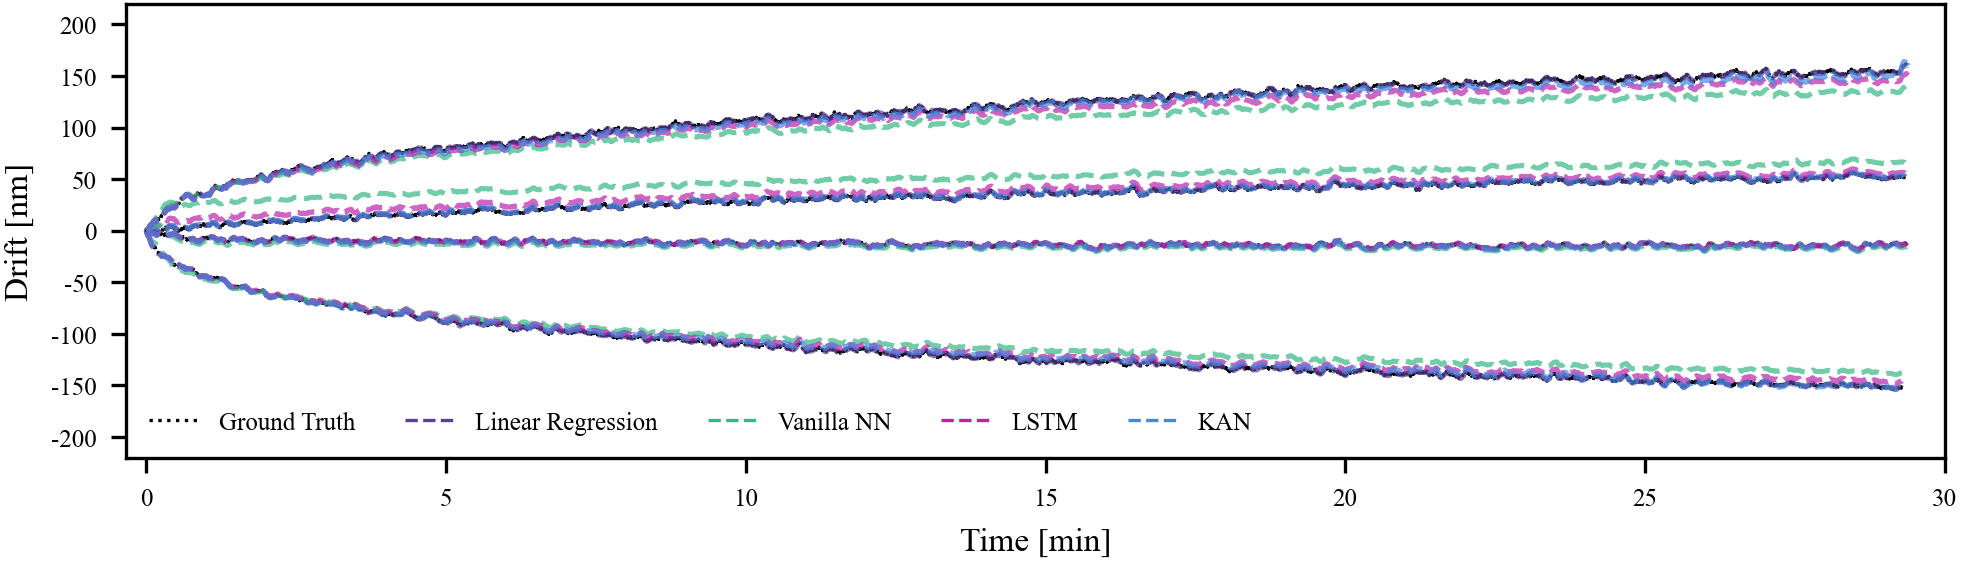

In [24]:
plt.rcParams.update({"figure.dpi": 300})
plt.rcParams.update(bundles.icml2022(column="full", family="serif", usetex=False, nrows=1, ncols=2))
plt.rcParams['font.serif'] = "Times New Roman"

cutoff = 18001

fig, ax = plt.subplots(1, 1)
msz = 0.1
lw = .8
alph = 1
alph_fill = 0.5

models = ['c_mean', 'linreg', 'nn', 'lstm', 'kan']
model_labels = ['Ground Truth', 'Linear Regression', 'Vanilla NN', 'LSTM', 'KAN']

data_cut = [data[1], data[3], data[2], data[14]]
#data_cut = [data[2]]
for i, df in enumerate(data_cut):
    for j, (model, label) in enumerate(zip(models, model_labels)):
        y = df[model]
        #y = (y - np.min(y)) / (np.max(y) - np.min(y))
        t = df.index
        y_mean = y.iloc[cutoff:].rolling(window=64, center=True, min_periods=1).mean()
        y_mean = y_mean - y_mean.iloc[0]
        y_mean = y_mean * 1.2*np.power(10, 6)/np.power(2, 16) # convert counter to nm
        time = df['time'].iloc[cutoff:] - df['time'].iloc[cutoff]
        ax.plot(time, y_mean, color=PRIMARY_COLORS[j], lw=1.2 if j > 0 else 0.8,
                alpha=0.7 if j > 0 else 1,
                linestyle='dashed' if j > 0 else 'dotted')

# for each color add a patch to the legend
for j, (model, label) in enumerate(zip(models, model_labels)):
    ax.plot([], [], color=PRIMARY_COLORS[j], lw=lw, label=label,
            linestyle='dashed' if j > 0 else 'dotted')

# ax.set_ylabel('Drift [%]')
# ax.set_ylim(-0.055, 0.055)
# ax.set_yticks(np.arange(-0.05, 0.055, 0.01))
# ax.set_yticklabels([f'{x * 100:.0f}' for x in ax.get_yticks()])
ax.set_ylabel('Drift [nm]')
ax.set_ylim(-220, 220)
ax.set_yticks(np.arange(-200, 210, 50))
ax.set_yticklabels([f'{x:.0f}' for x in ax.get_yticks()])

ax.set_xlabel('Time [min]')
ax.set_xlim(-20, 1800)
ax.set_xticks(np.arange(0, 1801, 300))
ax.set_xticklabels([f'{x // 60:.0f}' for x in np.arange(0, 1801, 300)])
# make the legent spread vertically
ax.legend(loc='lower left', ncol=5, frameon=False)
plt.tight_layout()
plt.savefig('./fig_creep_eval_drift.pdf')
plt.show()

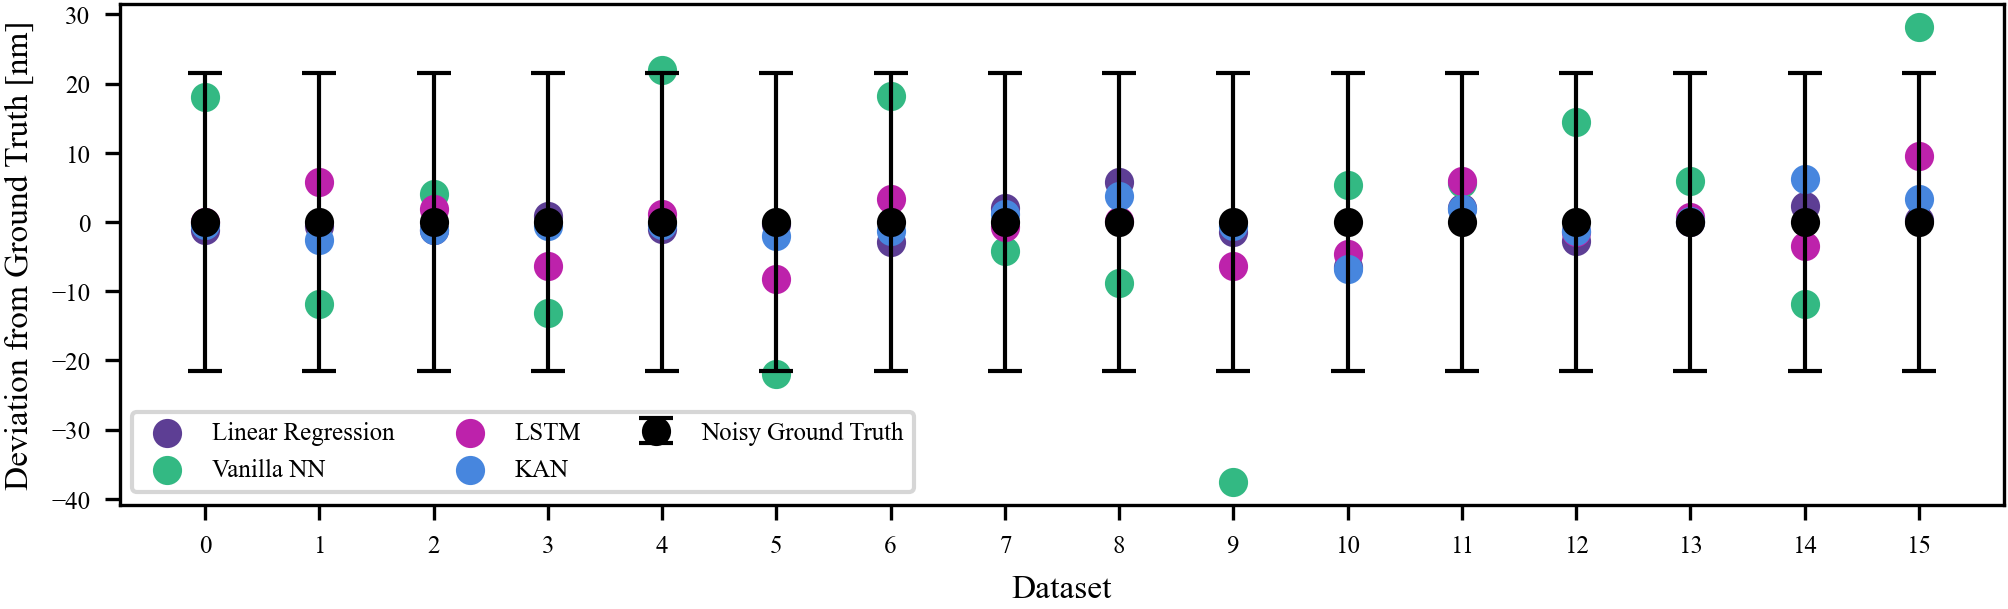

In [25]:
endpos_window = 96
fig, ax = plt.subplots(1, 1)
for i, df in enumerate(data):
    mean = df['c_mean'].iloc[-endpos_window:].mean()
    std = df['c_mean'].iloc[-100:].std()
    std = std * 1.2*np.power(10, 6)/np.power(2, 16)
    ax.errorbar(x=i,
                y=0,
                yerr=1.407*np.power(10, 6)/np.power(2, 16),
                fmt='o',
                color=PRIMARY_COLORS[0],
                capsize=4,
                linewidth=1,
                label='Noisy Ground Truth' if i == 0 else "_nolabel_")
    for j, (model, label) in enumerate(zip(models, model_labels)):
        if model == 'c_mean': continue
        end = df[model].iloc[-endpos_window:].mean() - mean
        end = end * 1.2*np.power(10, 6)/np.power(2, 16)
        ax.scatter(x=i,y=end, color=PRIMARY_COLORS[j], label=label if i == 0 else "_nolabel_")

ax.set_xticks(np.arange(0, len(data)))
ax.set_xticklabels([f'{i}' for i in range(len(data))])
ax.set_xlabel('Dataset')
ax.set_ylabel('Deviation from Ground Truth [nm]')

ax.legend(loc='lower left', ncol=3, frameon=True)
plt.savefig('./fig_creep_eval_deviation.pdf')
plt.show()